In [1]:
def kalman(gain, tempKalman, predictedVariance, variance, predictedTemp):
    gain = predictedVariance/(predictedVariance + r)
    tempKalman = predictedTemp + gain*(tempPT100 - predictedTemp)
    #tempKalman = predictedTemp + gain*(tempExt - predictedTemp)
    #tempKalman = predictedTemp + gain*(tempDHT22 - predictedTemp)
    variance = (1-gain)*predictedVariance
    predictedTemp = tempKalman
    predictedVariance = variance + q
    return [gain, tempKalman, predictedVariance, variance, predictedTemp]

def kalman2(gain2, tempKalman2, predictedVariance2, variance2, predictedTemp2):
    gain2 = predictedVariance2/(predictedVariance2 + r2)
    tempKalman2 = predictedTemp2 + gain2*(tempPT100 - predictedTemp2)
    #tempKalman = predictedTemp + gain*(tempExt - predictedTemp)
    #tempKalman = predictedTemp + gain*(tempDHT22 - predictedTemp)
    variance2 = (1-gain2)*predictedVariance2
    predictedTemp2 = tempKalman2
    predictedVariance2 = variance2 + q2
    return [gain2, tempKalman2, predictedVariance2, variance2, predictedTemp2]

def kalman3(gain3, tempKalman3, predictedVariance3, variance3, predictedTemp3):
    gain3 = predictedVariance3/(predictedVariance3 + r3)
    tempKalman3 = predictedTemp3 + gain3*(tempPT100 - predictedTemp3)
    variance3 = (1-gain3)*predictedVariance3
    predictedTemp3 = tempKalman3
    predictedVariance3 = variance3 + q3
    return [gain3, tempKalman3, predictedVariance3, variance3, predictedTemp3]

def kalman4(gain4, tempKalman4, predictedVariance4, variance4, predictedTemp4):
    gain4 = predictedVariance4/(predictedVariance4 + r4)
    tempKalman4 = predictedTemp4 + gain4*(tempPT100 - predictedTemp4)
    variance4 = (1-gain4)*predictedVariance4
    predictedTemp4 = tempKalman4
    predictedVariance4 = variance4 + q4
    return [gain4, tempKalman4, predictedVariance4, variance4, predictedTemp4]
    


PT100 = BLACK
PT100Kalman_1 = RED
PT100Kalman_2 = GREEN
PT100Kalman_3 = BLUE
PT100Kalman_4 = ORANGE
r =  4, q = 5
r2 = 4, q2= 1
r3 = 0.5, q3= 5
r4 = 0.5, q4= 20


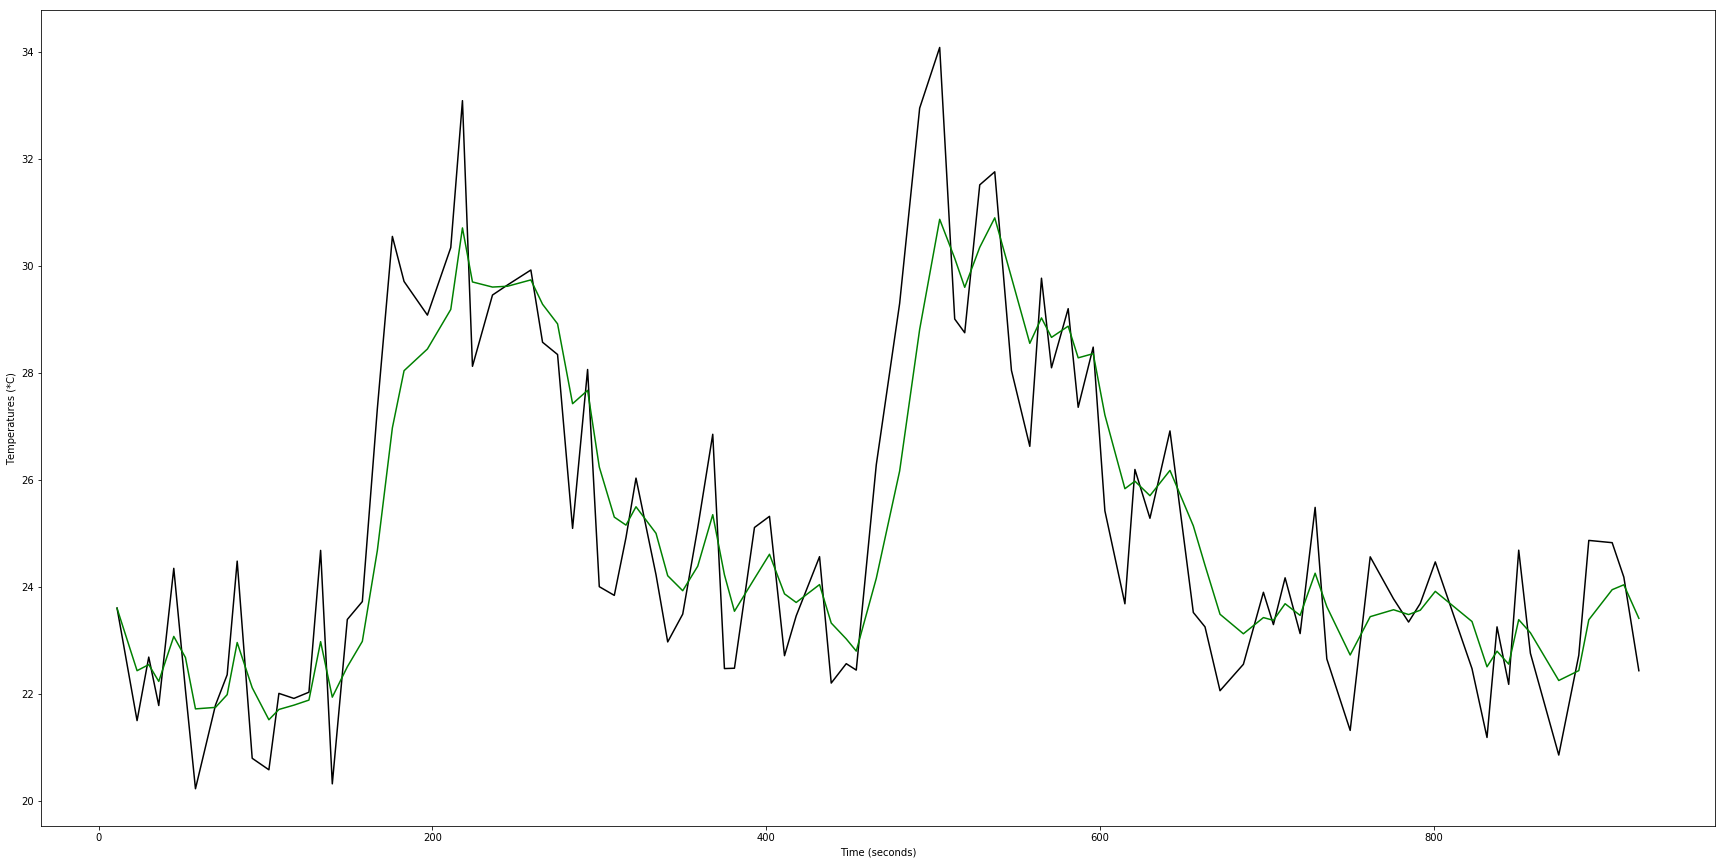

In [7]:
import datetime
import time
import Adafruit_DHT
import board
import busio
import digitalio
import adafruit_max31865
from w1thermsensor import W1ThermSensor


# import math functions
from math import *
import matplotlib.pyplot as plt
import numpy as np
from array import *
import matplotlib.pyplot as plt
import random

from IPython.display import display, clear_output
plt.rcParams['figure.figsize'] = [30, 15]

ds18b20Sensor = W1ThermSensor()
DHT22Sensor = Adafruit_DHT.DHT22
DHTpin = 16
i = 0

#Kalman variables
tempKalman = 0.
gain = 0.
variance = 10000.
predictedTemp = 10.

tempKalman2 = 0.
gain2 = 0.
variance2 = 10000.
predictedTemp2 = 10.

tempKalman3 = 0.
gain3 = 0.
variance3 = 10000.
predictedTemp3 = 10.

tempKalman4 = 0.
gain4 = 0.
variance4 = 10000.
predictedTemp4 = 10.

################################################################
q = 5             # Tune this constant for the data type ... Lower value makes smoother.
r = 4            # Tune this constant for the data type ... Higher value makes smoother.
################################################################
q2 = 1
r2 = 4
################################################################
q3 = 5
r3 = 0.5
################################################################
q4 = 20
r4 = 0.5
################################################################
n = 100           # Number of readings to take (iterations).
################################################################
predictedVariance = variance + q
predictedVariance2 = variance2 + q2
predictedVariance3 = variance3 + q3
predictedVariance4 = variance4 + q4

# Initialize SPI bus and sensor.
spi = busio.SPI(board.SCK, MOSI=board.MOSI, MISO=board.MISO)
cs = digitalio.DigitalInOut(board.D5)  # Chip select of the MAX31865 board.
sensor = adafruit_max31865.MAX31865(spi, cs)
# Note you can optionally provide the thermocouple RTD nominal, the reference
# resistance, and the number of wires for the sensor (2 the default, 3, or 4)
# with keyword args:
sensor = adafruit_max31865.MAX31865(spi, cs, rtd_nominal=100, ref_resistor=430.0, wires=4)

now = datetime.datetime.now()
#timeString = now.strftime("%Y-%m-%d %H:%M")
timeStringS = now.strftime("%S")
timeStringM = now.strftime("%M")
timeStringH = now.strftime("%H")
initialIntTimeString = int(timeStringS) + (int(timeStringM) * 60) + (int(timeStringH) * 60 * 60)

print('..... PROCESSING .....')

def getSensorData():
    #global timeString
    #global humLab
    global tempExt
    #global tempLab
    global tempPT100
    global tempDHT22
    global intTimeString

    now = datetime.datetime.now()
    #timeString = now.strftime("%Y-%m-%d %H:%M")
    timeStringH = now.strftime("%H")
    timeStringS = now.strftime("%S")
    timeStringM = now.strftime("%M")
    intTimeString = int(timeStringS) + (int(timeStringM) * 60) + (int(timeStringH) * 60 * 60)- initialIntTimeString
    
    tempExt = round(ds18b20Sensor.get_temperature(), 8)
    humDHT, tempDHT = Adafruit_DHT.read_retry(DHT22Sensor, DHTpin)
    if (humDHT is not None) and (tempDHT is not None):
        hum = round (humDHT,3)
        tempDHT22 = round (tempDHT, 8)
    
    tempPT100 = round (sensor.temperature,3)
    
    # Artificially make the temperature reading more noisy:
    tempPT100 = tempPT100 + (tempPT100 * random.uniform(-0.1, 0.1))
    
    # Print the values
    print('Countdown: ',i)
    print('PT100 sensor = {0:0.5f}*C'.format(tempPT100))
    print('DS18B20 Sensor = {}*C'.format(tempExt))
    print('DHT22 Sensor = {}*C'.format(tempDHT22))
    print('Kalman gain 1=' , round (gain,4))
    print('Kalman gain 2=' , round (gain2,4))
    print('Kalman gain 3=' , round (gain3,4))
    print('Kalman gain 4=' , round (gain4,4), end ="")
    clear_output(wait=True)
    #print()
    time.sleep(5.0)

    
array_DHT22 = array('f', [])
array_DS18B20 = array('f', [])
array_PT100 = array('f', [])
array_PT100Kalman = array('f', [])
array_PT100Kalman2 = array('f', [])
array_PT100Kalman3 = array('f', [])
array_PT100Kalman4 = array('f', [])
array_Time = array('i', [])

getSensorData()  # Warm up the sensors with one off reading

i = n
for x in range(n):
    try:
        getSensorData()
        #filter out crappy readings on DHT22 ... TODO: improve eg for readings close to zero
        if (x == 0):
            previousDHT22Temp = tempDHT22
        if ((tempDHT22 > previousDHT22Temp*1.2) or (tempDHT22 < previousDHT22Temp*0.8)):
            tempDHT22 = previousDHT22Temp
            print('ERROR CORRECTED!', end ="..")
        previousDHT22Temp = tempDHT22
        #end of filter
        
        gain, tempKalman, predictedVariance, variance, predictedTemp = kalman(gain, tempKalman, predictedVariance, variance, predictedTemp)
        gain2, tempKalman2, predictedVariance2, variance2, predictedTemp2 = kalman2(gain2, tempKalman2, predictedVariance2, variance2, predictedTemp2)
        gain3, tempKalman3, predictedVariance3, variance3, predictedTemp3 = kalman3(gain3, tempKalman3, predictedVariance3, variance3, predictedTemp3)
        gain4, tempKalman4, predictedVariance4, variance4, predictedTemp4 = kalman4(gain4, tempKalman4, predictedVariance4, variance4, predictedTemp4)
              
        array_DHT22.append(tempDHT22)
        array_DS18B20.append(tempExt)
        array_PT100.append(tempPT100)
        array_PT100Kalman.append(tempKalman)
        array_PT100Kalman2.append(tempKalman2)
        array_PT100Kalman3.append(tempKalman3)
        array_PT100Kalman4.append(tempKalman4)
        array_Time.append(intTimeString)
        i = i -1
        #print(i, end ="..")

    except RuntimeError as error:
        # Errors happen fairly often, DHT's are hard to read, just keep going
        print(error.args[0])

#plt.plot(array_Time, array_DHT22, color='blue')
#plt.plot(array_Time, array_DS18B20, color='orange')
plt.plot(array_Time, array_PT100, color='black')
#plt.plot(array_Time, array_PT100Kalman, color='red')
plt.plot(array_Time, array_PT100Kalman2, color='green')
#plt.plot(array_Time, array_PT100Kalman3, color='blue')
#plt.plot(array_Time, array_PT100Kalman4, color='orange')
plt.xlabel('Time (seconds)')
plt.ylabel('Temperatures (*C)')

print()
print('PT100 = BLACK')
print('PT100Kalman_1 = RED')
print('PT100Kalman_2 = GREEN')
print('PT100Kalman_3 = BLUE')
print('PT100Kalman_4 = ORANGE')
#print('DS18B20 = ORANGE')
##print('DHT22 = BLUE')
print('r = ', end =" ")
print(r, end =", ")
print('q = ', end ="")
print(q)

print('r2 = ', end ="")
print(r2, end =", ")
print('q2= ', end ="")
print(q2)

print('r3 = ', end ="")
print(r3, end =", ")
print('q3= ', end ="")
print(q3)

print('r4 = ', end ="")
print(r4, end =", ")
print('q4= ', end ="")
print(q4)